In [1]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')

val_df_liar = pd.read_csv('../LIAR/val.tsv', sep='\t')
val_df_fnd = pd.read_csv('../FakeNewsDataset/val.tsv', sep='\t')
val_df_isot = pd.read_csv('../ISOT/val.tsv', sep='\t')
val_df_covid = pd.read_csv('../Covid-19/val.tsv', sep='\t')

In [2]:
# no null values in dataset
train_df['title'].isnull().sum()

0

In [3]:
val_df['title'].isnull().sum()

0

In [4]:
print('Train real news:', train_df[train_df['true']==1].shape[0])
print('Train fake news:', train_df[train_df['true']==0].shape[0])

print('Val real news:', val_df[val_df['true']==1].shape[0])
print('Val fake news:', val_df[val_df['true']==0].shape[0])

Train real news: 13994
Train fake news: 4563
Val real news: 3447
Val fake news: 1192


In [5]:
#sample real news
train_df[train_df['true']==1].sample(n=1)['title'].iloc[0]

'James Corden responds to Dave Grohl’s comments about being “uncomfortable” on Carpool Karaoke'

In [6]:
#sample fake news
train_df[train_df['true']==0].sample(n=1)['title'].iloc[0]

"Meghan Markle Is Not Having a Maid of Honor — and Here's Why"

In [7]:
# word count in news
word_counts_train = train_df['title'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    18557.000000
mean        11.156491
std          3.988529
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         53.000000
Name: title, dtype: float64

In [8]:
word_counts_val = val_df['title'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    4639.000000
mean       11.179996
std         3.934421
min         1.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        34.000000
Name: title, dtype: float64

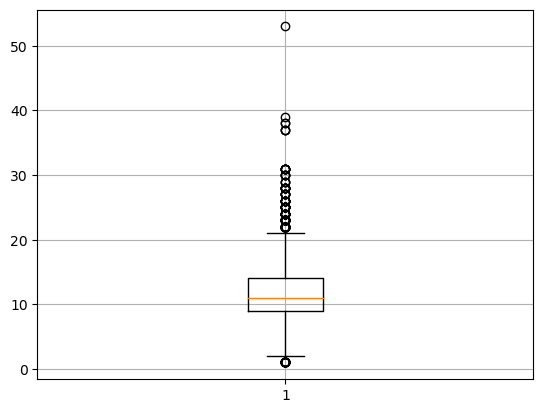

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(word_counts_train)
plt.grid(True)
plt.show()

In [10]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [12]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
train_df['preprocessed_title'] = train_df['title'].apply(lambda review: data_preprocessing(review))
train_df

,title,true,preprocessed_title
0,Kelsea Ballerini and Morgan Evans Marry in Mexico,1,kelsea ballerini morgan evans marry mexico
1,2018 BAFTA TV Awards complete list of nominati...,1,2018 bafta tv award complete list nomination e...
2,Meghan Markle Already Pregnant Month After Roy...,0,meghan markle already pregnant month royal wed...
3,Transcript: Blue-Ribbon Panel on Health Care,1,transcript blue ribbon panel health care
4,15 Things You Should Never Say to a Hardcore K...,1,15 thing never say hardcore katy perry fan
...,...,...,...
18552,RHONY: The Craziest Moments from the Epic Mexi...,1,rhony craziest moment epic mexico vacation
18553,Paris Jackson Celebrates 20th with Chris Brown...,1,paris jackson celebrates 20th chris brown pari...
18554,💕Justin Bieber and Selena Gomez Taking Some Sp...,1,justin bieber selena gomez taking space call b...
18555,Hilary Duff Is Pregnant! Actress Expecting a '...,1,hilary duff pregnant actress expecting little ...


In [15]:
val_df['preprocessed_title'] = val_df['title'].apply(lambda review: data_preprocessing(review))
val_df

,title,true,preprocessed_title
0,Sen. Gregg: President Obama's Budget Proposal ...,1,sen gregg president obama budget proposal disa...
1,Blake Shelton BURNS Luke Bryan for Offering to...,0,blake shelton burn luke bryan offering officia...
2,Prince Harry Reportedly Sought Kate Middleton'...,0,prince harry reportedly sought kate middleton ...
3,5 Awkward Details About Blake Shelton And Gwen...,0,5 awkward detail blake shelton gwen stefani re...
4,The 23 best moments from the 2018 Winter Olympics,1,23 best moment 2018 winter olympics
...,...,...,...
4634,Sam Hunt Thanks Wife in BBMAs Speech After The...,1,sam hunt thanks wife bbmas speech hit award sh...
4635,"Why Camila Cabello Is ""Traumatized"" to Do Her ...",1,camila cabello traumatized eyeliner
4636,New Couple Emma Watson and Robert Pattinson Se...,0,new couple emma watson robert pattinson seemin...
4637,Robert Kardashian,1,robert kardashian


In [16]:
val_df_liar['preprocessed_title'] = val_df_liar['statement'].apply(lambda review: data_preprocessing(review))
val_df_fnd['preprocessed_title'] = val_df_fnd['title'].apply(lambda review: data_preprocessing(review))
val_df_isot['preprocessed_title'] = val_df_isot['title'].apply(lambda review: data_preprocessing(review))
val_df_covid['preprocessed_title'] = val_df_covid['title'].apply(lambda review: data_preprocessing(review))

print('ISOT length:', len(val_df_isot))
print('LIAR length:', len(val_df_liar))
print('FakeNewsDataset length:', len(val_df_fnd))
print('FakeNewsNet length:', len(val_df))
print('Covid-19 length:', len(val_df_covid))

ISOT length: 8980
LIAR length: 1589
FakeNewsDataset length: 4048
FakeNewsNet length: 4639
Covid-19 length: 624


In [17]:
X_val_liar = val_df_liar['preprocessed_title']
y_val_liar = val_df_liar['label']

X_val_fnd = val_df_fnd['preprocessed_title']
y_val_fnd = val_df_fnd['true']

X_val_isot = val_df_isot['preprocessed_title']
y_val_isot = val_df_isot['true']

X_val_covid = val_df_covid['preprocessed_title']
y_val_covid = val_df_covid['true']

In [18]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['true']
y_val = val_df['true']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (18557,) (18557,)
Test data: (4639,) (4639,)


In [19]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (18557, 2683)
X_test_news_tfidf shape: (4639, 2683)


In [20]:
X_val_liar_tfidf = vectorizer.transform(X_val_liar)
X_val_fnd_tfidf = vectorizer.transform(X_val_fnd)
X_val_isot_tfidf = vectorizer.transform(X_val_isot)
X_val_covid_tfidf = vectorizer.transform(X_val_covid)

In [21]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = MultinomialNB(alpha=1)
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val, y_pred))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6411422190316662
LIAR: 0.702680412371134
FakeNewsDataset: 0.6207257501744592
FakeNewsNet: 0.8921330089213302
Covid-19: 0.7522750252780587


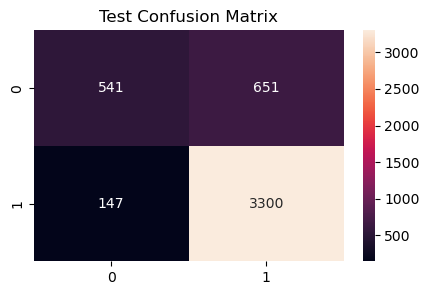

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
#print('Test Accuracy:', accuracy_score(y_val, y_pred))

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val, y_pred))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.5970011958421488
LIAR: 0.6986936367467341
FakeNewsDataset: 0.5698005698005698
FakeNewsNet: 0.8902405308266519
Covid-19: 0.733828207847296


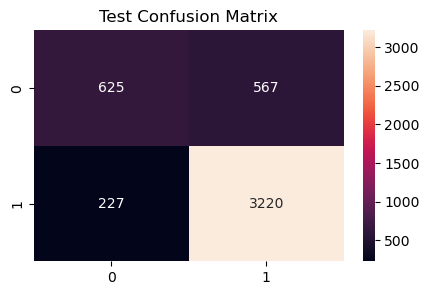

In [24]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [25]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val, y_pred))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.658740157480315
LIAR: 0.702791461412151
FakeNewsDataset: 0.6396551724137931
FakeNewsNet: 0.8792918454935622
Covid-19: 0.7625754527162978


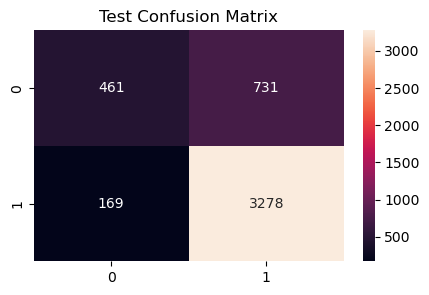

In [26]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val, y_pred))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6436117656000607
LIAR: 0.7040523945968072
FakeNewsDataset: 0.6386583093342368
FakeNewsNet: 0.8699326554865973
Covid-19: 0.7547547547547547


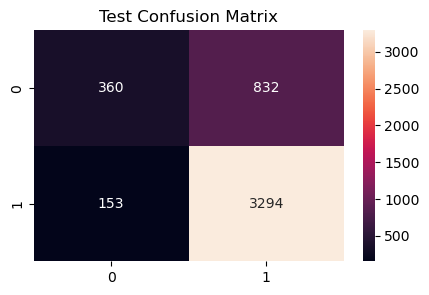

In [28]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [29]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_news_tfidf, y_train)

y_pred = xgb_model.predict(X_val_news_tfidf)
y_pred_liar = xgb_model.predict(X_val_liar_tfidf)
y_pred_fnd = xgb_model.predict(X_val_fnd_tfidf)
y_pred_isot = xgb_model.predict(X_val_isot_tfidf)
y_pred_covid = xgb_model.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val, y_pred))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6603511637403021
LIAR: 0.7023907666941468
FakeNewsDataset: 0.627526806117068
FakeNewsNet: 0.8891873740765615
Covid-19: 0.7713717693836978


In [30]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val, y_pred))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6413134528396717
LIAR: 0.7012772970745776
FakeNewsDataset: 0.6154674322626952
FakeNewsNet: 0.8993343295747861
Covid-19: 0.7598784194528875
